# Part-3
## Business Understanding: “What is the relationship of reviews with price?”

There are so many factors which contribute towards the price of a listing on AirBnB. While we already have few conclusions for relationship between prices and their dependency on various factors of a listing, let's analyze if price of a listing is dependent on number of reviews or not and if the relationship exists, how does it affect the prices?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
reviewsDF = pd.read_csv("../data/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
!pip install langdetect

#### Assigning polarity score to each comment and adding the same to dataframe

To retrieve the polarity of comments i.e. whether a comment is 'positive'or 'negative' or 'neutral' we are using built-in analyzer in the NLTK Python library to assign polarity score to each comment.

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future r

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.000,0.538,0.462,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.391,0.609,0.9872
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...","{'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'co...",0.043,0.185,0.772,0.8718
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,"{'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'comp...",0.035,0.200,0.765,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.000,0.345,0.655,0.9783


In [4]:
reviewsDF.to_csv('../data/generated_files/polarity_values_reviews.csv')

As a preprocessing step, I removed the comments which are not in English because I used  built-in analyzer in the NLTK Python library to assign polarity score to each comment and this analyzer doesn't interpret languages other than English.

In [5]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)
#     print(lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.0,0.538,0.462,0.7901,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.0,0.391,0.609,0.9872,en


#### Visualizing the polarity score for positivity

In [6]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,1648,0.0,positive
1,14115,0.1,positive
2,29157,0.2,positive
3,22298,0.3,positive
4,9887,0.4,positive


#### Visualizing polarity score for negativity

In [7]:

polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,count_of_Comments,RANGE,Sentiment
0,24927,0.0,negative
1,1162,0.1,negative
2,84,0.2,negative
3,21,0.3,negative
4,3,0.4,negative


#### Visualizing polarity score for neutrality

In [8]:
polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,8,0.0,neutrl
1,155,0.1,neutrl
2,567,0.2,neutrl
3,1348,0.3,neutrl
4,3858,0.4,neutrl


#### Plotting the number of comments against the polarity range

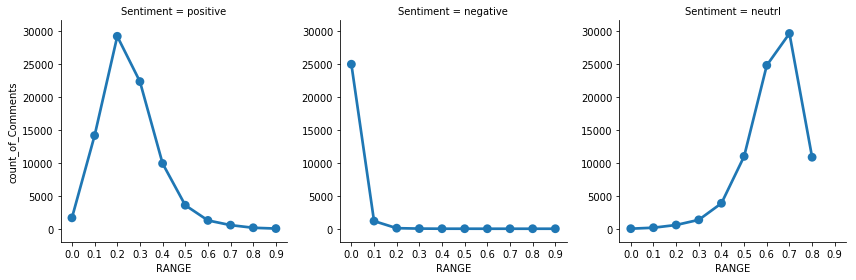

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment") 


After calculating polarity, and plotting it on a graph, most of the comments have 0 negative polarity. i.e. most of the comments are either neutral or positive.

### Interpreting the relation between number of reviews and prices

Text(0,0.5,'Number of reviews')

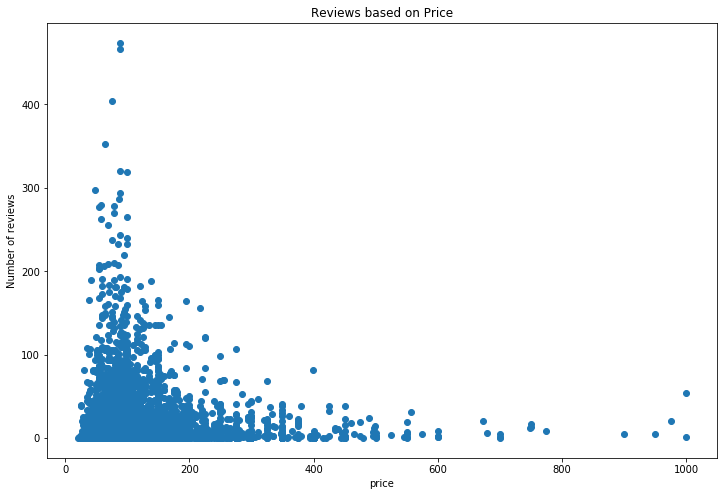

In [10]:
inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

- From the graph, the reviews were most observed for the listings that have a price range around 100 - 300. The number quickly declines as the price goes up. <br>
- It shows that, there is no necessity for an expensive listing to have more reviews. Hence, the Prices have no relation with the Number of reviews.

#### Analyzing the most used words in the comments

In [11]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in EngReviewsDF.iterrows():
    words += row['comments']

In [12]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [13]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

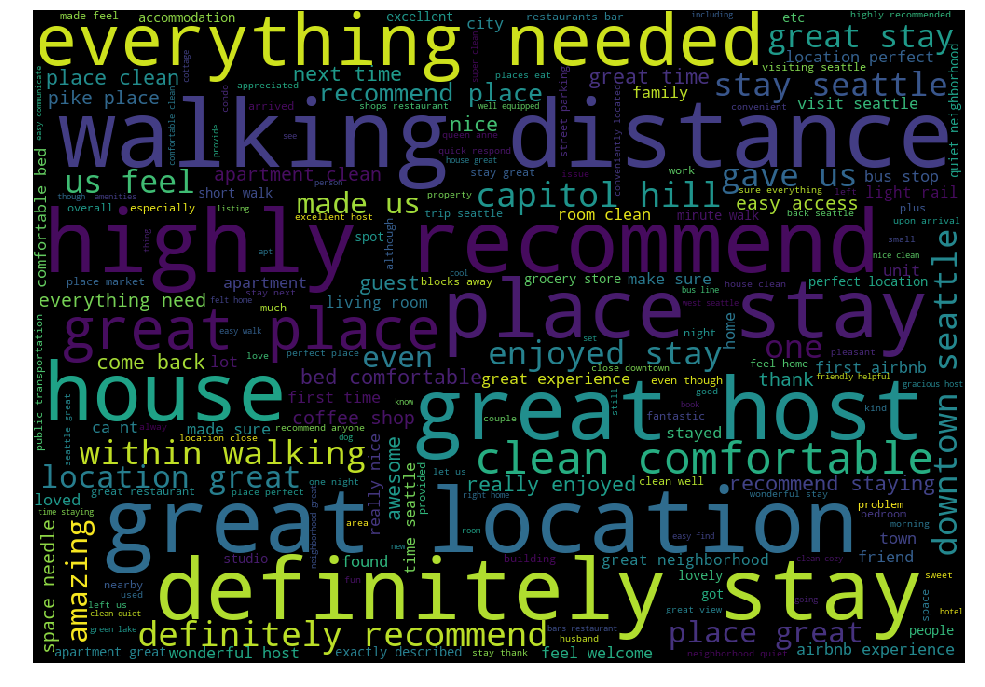

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The words like "great host", "definitely recommended", "comfortable", "everything needed" were most used by the customers. These reviews and comments play a big role in attracting the attention of travelers.